<h2>Predicting Digits with KNN</h2>

Esse é um exercicio ensinado pela escola:
<a href = 'https://www.datascienceacademy.com.br/'>Data Science Academy</a>

O objetivo é realizar uma classificação multiclasse usando o algoritmo KNN (K Nearest Neighbor) baseado nas dez imagens de digitos mostradas abaixo. O dataset está disponível no pacote scikit learn, também pode ser acessado pelo endereço: <a href = 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits'>https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits</a>

Os dados referentes aos digitos estão armazenados em formato matricial, pois, uma imagem é uma matriz de pixels, nesse caso cada digito possui dimensão de 8x8 px, totalizando uma área de 64 pixels. Esses pixels são posicionados em formato de vetor (1 dimensão), por esse fato o dataset, possui 64 features/atributos/colunas.

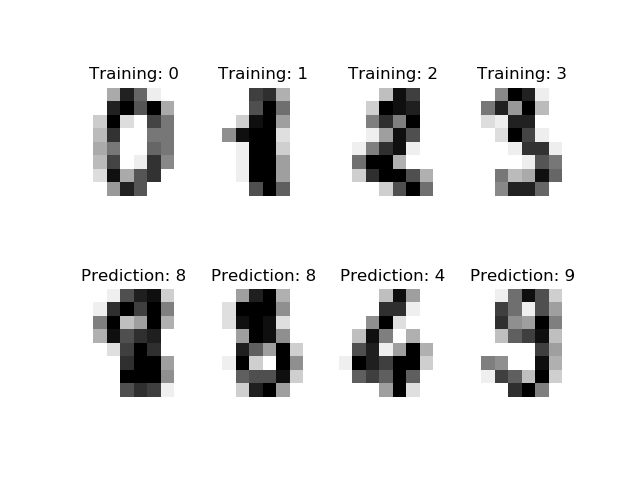

In [1]:
from IPython.display import Image
Image('imagens/digitos.png')

Loading and exploring the dataset

In [24]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
digitos = datasets.load_digits()

In [4]:
type(digitos)

sklearn.utils.Bunch

In [5]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

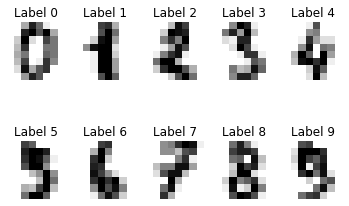

In [6]:
images_e_labels = list(zip(digitos.images, digitos.target))
for indice, (image, label) in enumerate(images_e_labels[:10]):
    plt.subplot(2,5, indice + 1)
    plt.axis('off')
    plt.imshow(image, cmap= plt.cm.gray_r)
    plt.title(f'Label {label}')
    

In [7]:
# Indica que tenho 1797 registros de imagens salvas
digitos.data.shape

(1797, 64)

In [8]:
# 1797 variáveis target
digitos.target.shape

(1797,)

In [9]:
# Separando variáveis explanatória e variável target
X = digitos.data
y = digitos.target

Realizando a divisão, dados de treino, dados de teste, dados de validação

A divisão será:
- 70% Treino, 
- 20% Teste
- 10% Validação

In [10]:
seed = 101
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = seed)

In [11]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("X_train: {}".format(len(x_train)))
print("Y_train: {}".format(len(y_train)))
print("X_test: {}".format(len(x_test)))
print("Y_test: {}".format(len(y_test)))

X_train: 1257
Y_train: 1257
X_test: 540
Y_test: 540


In [12]:
### Separando as amostras de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(x_train, 
                                                                    y_train, 
                                                                    test_size = 0.1, 
                                                                    random_state = 84)

In [13]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("TreinoData: {}".format(len(treinoData)))
print("ValidData: {}".format(len(validData)))
print("TreinoLabels: {}".format(len(treinoLabels)))
print("ValidLabels: {}".format(len(validLabels)))

TreinoData: 1131
ValidData: 126
TreinoLabels: 1131
ValidLabels: 126


Como podemos ver, primeiramente fizemos uma divisão baseada em:
- 70% dados de treino
- 30% dados de teste

Resultando em 1257 amostras para treino e 540 para teste respectivamente.<br>
Na segunda divisão usamos os dados de treino, 70%, e mantivemos 90% para validação, e das 540 amostras de teste, 30% do dataset original, separamos em 10% para validarmos durante o treinamento.

<h2>Normalizando os dados</h2>

Iremos normalizar os dados fazendo uso do pacote numpy

In [22]:
x_norm = np.mean(X, axis=0)
x_norm.shape

X_treino_norm = treinoData - x_norm
X_valid_norm = validData - x_norm
X_teste_norm = x_test - x_norm

In [26]:
## Preparando o teste para verificar 
k_vals = range(1,50, 2)
acuracia = []